In [110]:
import numpy as np
import matplotlib.pyplot as plt

dataDir = "/mnt/share/titanic"
data = np.loadtxt(dataDir + "/train.csv",delimiter=",", 
                  skiprows=1, 
                  dtype={'names': ('PassengerId','Survived','Pclass', 
                                   'Name','Sex','Age','SibSp','Parch',
                                   'Ticket','Fare','Cabin','Embarked'),
                         'formats':()
')})

x = data[0]
y = data[1]
plt.plot(x,y)

SyntaxError: EOL while scanning string literal (<ipython-input-110-34a094423ee2>, line 11)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data_dir = "/mnt/share/titanic"
org_train = pd.read_csv(data_dir + "/train.csv")
org_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [91]:
org_test = pd.read_csv(data_dir + "/test.csv")
org_test.dtypes
org_test.count() #418

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [121]:
org_test.dropna(subset=['Fare']).count()

PassengerId    417
Pclass         417
Name           417
Sex            417
Age            417
SibSp          417
Parch          417
Ticket         417
Fare           417
Cabin           91
Embarked       417
dtype: int64

In [77]:
from sklearn import preprocessing

#le = preprocessing.LabelEncoder()
#org_train['Name'].apply(le.fit_transform)
#print(type(org_train))
#print(type(org_train['Ticket']))
org_train["Age"].fillna(org_train.Age.mean(), inplace=True)   
train = org_train.assign(
    TicketNum=org_train['Ticket'] \
    .apply(lambda x: x.split(" ")[-1])) \
    .assign(SexInt=org_train['Sex'].apply(lambda x: 0 if x == "male" else 1))\
    .loc[:,['PassengerId','Survived','Pclass','SexInt','Age','SibSp','Parch','TicketNum','Fare','Cabin','Embarked']]
le_cabin = preprocessing.LabelEncoder()
le_embarked = preprocessing.LabelEncoder()
#train.Cabin = le_cabin.fit_transform(train.Cabin)
#train.Embarked = le_embarked.fit_transform(train.Embarked)
trainA = train.assign(TicketInt=train['TicketNum'].apply(lambda x: 0 if x.isdigit() else x))
trainA.TicketInt.drop_duplicates()
org_train.iloc[179,:]

#org_train.count()  ## 891
#org_train.dropna(subset=['Age']).count() ## 791
#org_train.dropna(subset=['Age']).mean() ## Age mean = 29.699118
#org_train.mean() ## Age mean 29.699118
#org_train['Ticket'](lambda x: str(x).split(" ").length > 1 and str(x).split(" ")(1) or x )

PassengerId                    180
Survived                         0
Pclass                           3
Name           Leonard, Mr. Lionel
Sex                           male
Age                             36
SibSp                            0
Parch                            0
Ticket                        LINE
Fare                             0
Cabin                          NaN
Embarked                         S
Name: 179, dtype: object

In [6]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import csv as csv
from collections import OrderedDict
from sklearn.metrics import mean_squared_error



# データを読み込む
data_dir = "/Users/chiehayashida/work/kaggle/titanic_split"
org_train = pd.read_csv(data_dir + "/train_split.csv")
org_test = pd.read_csv(data_dir + "/test_split.csv")

# 訓練データの加工
org_train["Age"].fillna(org_train.Age.mean(), inplace=True)   
train = org_train.assign(
    TicketNum=org_train['Ticket'] \
    .apply(lambda x: x.split(" ")[-1])) \
    .assign(SexInt=org_train['Sex'].apply(lambda x: 0 if x == "male" else 1))\
    .loc[:,['PassengerId','Survived','SexInt','Age','SibSp','Parch','Fare']]
train_tgt = train.values[:,1]
train_features = train.values[:,2::]

# 評価データの加工
org_test["Age"].fillna(org_test.Age.mean(), inplace=True)
org_test["Fare"].fillna(org_test.Fare.mean(), inplace=True)
test = org_test.assign(
    TicketNum=org_test['Ticket'] \
    .apply(lambda x: x.split(" ")[-1])) \
    .assign(SexInt=org_test['Sex'].apply(lambda x: 0 if x == "male" else 1))\
    .loc[:,['PassengerId','SexInt','Age','SibSp','Parch','Fare']]

test_idx = test.values[:,0].astype(int)
test_features = test.values[:,1::]

# ロジスティック回帰による予測
model = LogisticRegression(solver='lbfgs')
output = model.fit(train_features, train_tgt).predict(test_features)
output_with_idx = zip(test_idx, output.astype(int))



## ファイル出力
output_file = open(data_dir + "/titanic_submit.csv","w")
f = csv.writer(output_file)
f.writerow(['PassengerId','Survived'])
f.writerows(output_with_idx)
output_file.close()

test = pd.read_csv(data_dir + "/titanic_submit.csv")

answer = pd.read_csv(data_dir + "/answer_split.csv")
mean_squared_error(answer.Survived, test.Survived)


0.20000000000000001

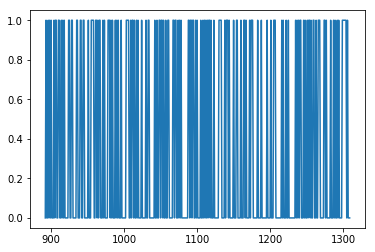

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

x = test_idx
y = output
plt.plot(x,y)

In [30]:
train.values[0::,1::]

array([[0, 0, 22.0, ..., 7.25, nan, 'S'],
       [1, 1, 38.0, ..., 71.2833, 'C85', 'C'],
       [1, 1, 26.0, ..., 7.925, nan, 'S'],
       ..., 
       [0, 1, 29.69911764705882, ..., 23.45, nan, 'S'],
       [1, 0, 26.0, ..., 30.0, 'C148', 'C'],
       [0, 0, 32.0, ..., 7.75, nan, 'Q']], dtype=object)

In [34]:
from collections import defaultdict
d = defaultdict(LabelEncoder)
fit = train.apply(lambda x: d[x.name].fit_transform(x))

NameError: name 'LabelEncoder' is not defined

In [120]:
org_train.Cabin.drop_duplicates()

0              NaN
1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
128          F E69
136            D47
139            B86
148             F2
151             C2
166            E33
          ...     
690            B20
699          F G63
700        C62 C64
701            E24
710            C90
716            C45
724             E8
737           B101
740            D45
741            C46
748            D30
751           E121
765            D11
772            E77
776            F38
779             B3
782             D6
789        B82 B84
796            D17
806            A36
815           B102
820         

In [108]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s.apply(type)
type(s.apply(lambda x: (x, x * 2)))
# type(s.apply(lambda x: pd.Series([x, x * 2], index=['col1', 'col2'])))

pandas.core.series.Series